In [643]:
# pandas data structures tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [644]:
def get_linear_model(beta_0, beta_1):
    def model(xs):
        return beta_0 + beta_1 * xs
    return model

def get_costs_function(X, y, get_model):
    def get_costs_for(beta_0, beta_1):
        model = get_model(beta_0, beta_1)
        return mean_squared_error(y, model(X))
    return get_costs_for


def plot_J(ax, bbeta_0, bbeta_1, X, y, bbeta_0_deltas = None, bbeta_1_deltas = None, beta_delta = 0, get_model = None):

    cost_function = get_costs_function(X, y, get_model)

    bbeta_0_deltas = bbeta_0_deltas or []
    bbeta_1_deltas = bbeta_1_deltas or []

    pre = 64
    if len(bbeta_0_deltas) > 0:
        beta_delta = max(*bbeta_0_deltas, beta_delta)
    if len(bbeta_1_deltas) > 0:
        beta_delta = max(*bbeta_1_deltas, beta_delta)

    beta_0s, beta_1s = np.meshgrid(
        np.linspace(bbeta_0-beta_delta, bbeta_0+beta_delta, pre),
        np.linspace(bbeta_1-beta_delta, bbeta_1+beta_delta, pre)
    )

    costs = np.empty([pre, pre])

    for i in range(0, pre):
        for j in range(0, pre):
            costs[j, i] = cost_function(beta_0s[j, i], beta_1s[j, i])

    ax.plot_surface(beta_0s, beta_1s, costs, cmap=cm.jet, alpha=0.5)

    steps_x, steps_y, steps_z = [], [], []
    for bbeta_0_delta, bbeta_1_delta in zip(bbeta_0_deltas, bbeta_1_deltas):
        ebeta_0, ebeta_1 = bbeta_0 - bbeta_0_delta, bbeta_1 - bbeta_1_delta
        steps_x.append(ebeta_0)
        steps_y.append(ebeta_1)
        steps_z.append(cost_function(ebeta_0, ebeta_1))
        y_bottom = ax.get_zlim()[0]
        if bbeta_0_delta != bbeta_0_deltas[-1]:
            ax.plot(xs=[ebeta_0, ebeta_0], ys=[ebeta_1, ebeta_1], zs=[cost_function(ebeta_0, ebeta_1), y_bottom], c='orange', alpha=0.2)
        else:
            ax.plot(xs=[ebeta_0, ebeta_0], ys=[ebeta_1, ebeta_1], zs=[cost_function(ebeta_0, ebeta_1), y_bottom], c='green')

    ax.plot(xs=steps_x, ys=steps_y, zs=steps_z, c='red')

    ax.set_xlabel('beta_0')
    ax.set_ylabel('beta_1')
    ax.set_zlabel('cost')

    # ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([])
    # ax.axes.zaxis.set_ticks([])


In [645]:
def plot_J_contour(ax, bbeta_0, bbeta_1, X, y, bbeta_0_deltas = None, bbeta_1_deltas = None, beta_delta = 0, get_model = None):

    cost_function = get_costs_function(X, y, get_model)

    bbeta_0_deltas = bbeta_0_deltas or []
    bbeta_1_deltas = bbeta_1_deltas or []

    pre = 64
    if len(bbeta_0_deltas) > 0:
        beta_delta = max(*bbeta_0_deltas, beta_delta)
    if len(bbeta_1_deltas) > 0:
        beta_delta = max(*bbeta_1_deltas, beta_delta)

    beta_0s, beta_1s = np.meshgrid(
        np.linspace(bbeta_0-beta_delta, bbeta_0+beta_delta, pre),
        np.linspace(bbeta_1-beta_delta, bbeta_1+beta_delta, pre)
    )

    costs = np.empty([pre, pre])

    for i in range(0, pre):
        for j in range(0, pre):
            costs[j, i] = cost_function(beta_0s[j, i], beta_1s[j, i])

    ax.contour(beta_0s, beta_1s, costs, cmap=cm.jet)

    steps_x, steps_y = [], []
    for bbeta_0_delta, bbeta_1_delta in zip(bbeta_0_deltas, bbeta_1_deltas):
        ebeta_1, ebeta_2 = bbeta_0 - bbeta_0_delta, bbeta_1 - bbeta_1_delta
        steps_x.append(ebeta_1)
        steps_y.append(ebeta_2)
        if bbeta_0_delta != bbeta_0_deltas[-1]:
            ax.scatter(ebeta_1, ebeta_2, c='orange', alpha=0.2)
        else:
            ax.scatter(ebeta_1, ebeta_2, c='green')

    ax.plot(steps_x, steps_y, c='red')

    ax.set_xlabel('beta_0')
    ax.set_ylabel('beta_1')

    # ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([])


In [646]:
out_dir = os.path.join(os.getcwd(), "../../out")

In [647]:
df = pd.read_csv('data/fish.csv').rename(columns={
    'Width': 'width (cm)',
    'Length1': 'length (cm)',
    'Weight': 'weight (g)'
})

In [648]:
from sklearn.decomposition import PCA

X_norm = StandardScaler().fit_transform(PCA().fit_transform(StandardScaler().fit_transform(df[['width (cm)']])))
y = StandardScaler().fit_transform(df[['weight (g)']])

In [649]:
model = LinearRegression()
model.fit(X_norm, y)
bbeta_0 = model.intercept_[0]
bbeta_1 = model.coef_[0][0]
print(bbeta_0, bbeta_1)

9.646996211024683e-18 0.8865066052433448


In [650]:
bbeta_0_deltas = list(map(lambda x: x / 2, [5, 3.5, 2.7, 1.9, 1.2, 0]))
bbeta_1_deltas = list(map(lambda x: x / 2, [5, 4.0, 3.0, 2.0, 1.0, 0]))

In [651]:
beta_delta = max(bbeta_0_deltas + bbeta_1_deltas)

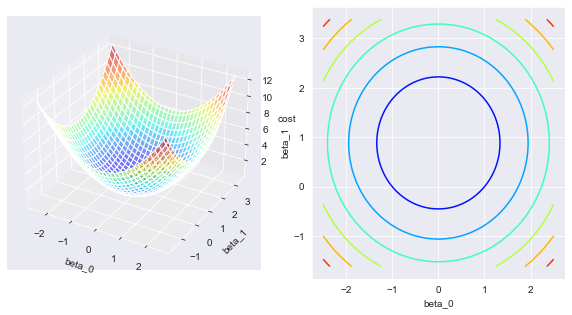

In [652]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_J(ax, bbeta_0, bbeta_1, X_norm, y, beta_delta=beta_delta, get_model=get_linear_model)
ax2d = fig.add_subplot(1, 2, 2)
ax2d.set_xlim(ax.get_xlim())
ax2d.set_ylim(ax.get_ylim())
plot_J_contour(ax2d, bbeta_0, bbeta_1, X_norm, y, beta_delta=beta_delta, get_model=get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_cost_function.png'))
plt.show()

In [653]:
def plot_gradient_descent(bbeta_0, bbeta_1, X, y, bbeta_0_deltas = None, bbeta_1_deltas = None, beta_delta = 0, get_model = None):
    """
    WARNING: This function does only visualize how gradient descent works.
    The actual plots are a lie :D and do not depend on each other.
    """

    bbeta_0_deltas = bbeta_0_deltas or []
    bbeta_1_deltas = bbeta_1_deltas or []

    fig = plt.figure(figsize=(15, 5), facecolor='white')
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    plot_J(ax, bbeta_0, bbeta_1, X, y, bbeta_0_deltas, bbeta_1_deltas, beta_delta, get_model)
    ax_contour = fig.add_subplot(1, 3, 2)
    ax_contour.set_xlim(ax.get_xlim())
    ax_contour.set_ylim(ax.get_ylim())
    plot_J_contour(ax_contour, bbeta_0, bbeta_1, X, y, bbeta_0_deltas, bbeta_1_deltas, beta_delta, get_model)
    ax = fig.add_subplot(1, 3, 3)

    ax.scatter(X, y, s=1)

    for bbeta_0_delta, bbeta_1_delta in zip(bbeta_0_deltas, bbeta_1_deltas):
        model = get_model(bbeta_0 - bbeta_0_delta, bbeta_1 - bbeta_1_delta)
        sx = np.sort(X, axis=0)
        if bbeta_0_delta != bbeta_0_deltas[-1]:
            ax.plot(sx, model(sx), c='orange', alpha=0.2)
        else:
            ax.plot(sx, model(sx), c='green')

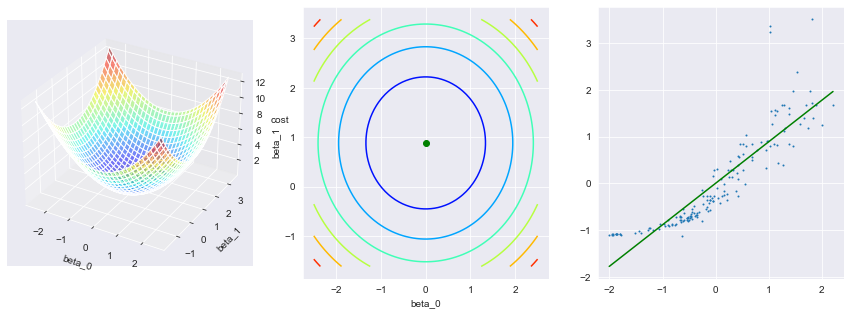

In [654]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [0], [0], beta_delta, get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_solution.png'))
plt.show()

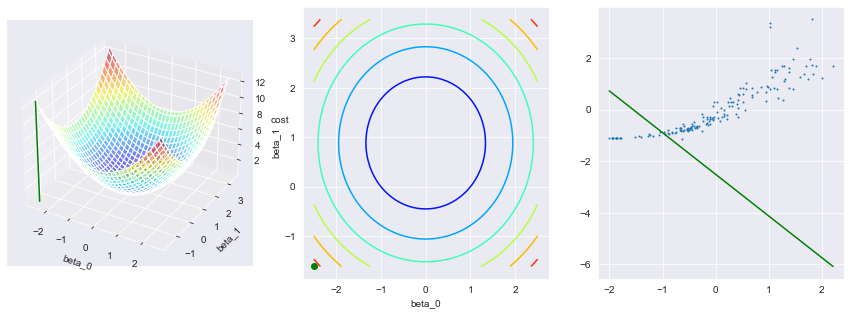

In [655]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, bbeta_0_deltas[:1], bbeta_1_deltas[:1], get_model=get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_0.png'))
plt.show()

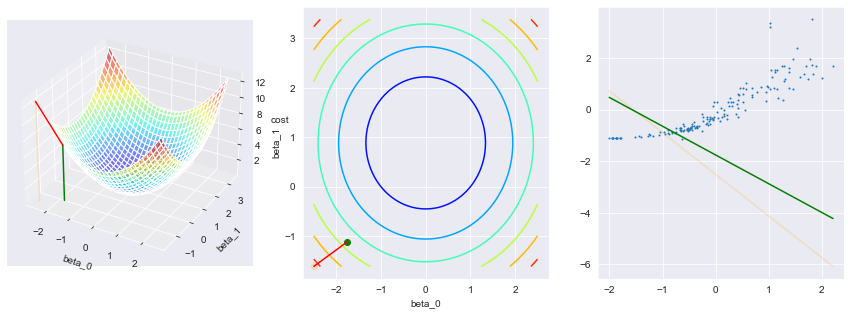

In [656]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, bbeta_0_deltas[:2], bbeta_1_deltas[:2], get_model=get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_1.png'), transparent=False)
plt.show()

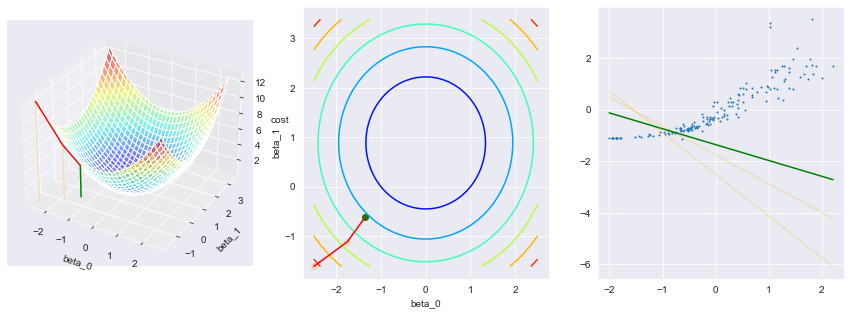

In [657]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, bbeta_0_deltas[:3], bbeta_1_deltas[:3], get_model=get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_2.png'))
plt.show()

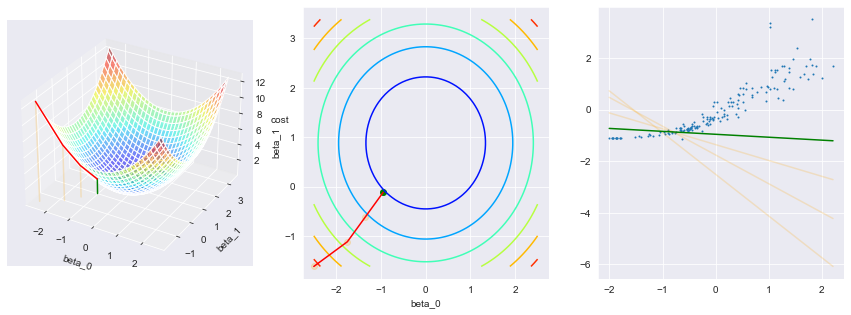

In [658]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, bbeta_0_deltas[:4], bbeta_1_deltas[:4], get_model=get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_3.png'))
plt.show()

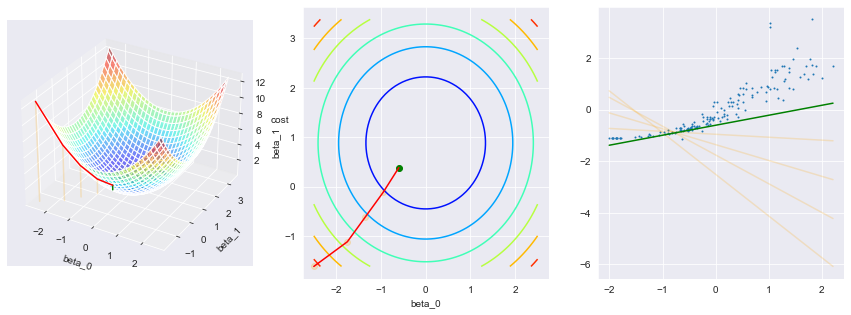

In [659]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, bbeta_0_deltas[:5], bbeta_1_deltas[:5], get_model=get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_4.png'))
plt.show()

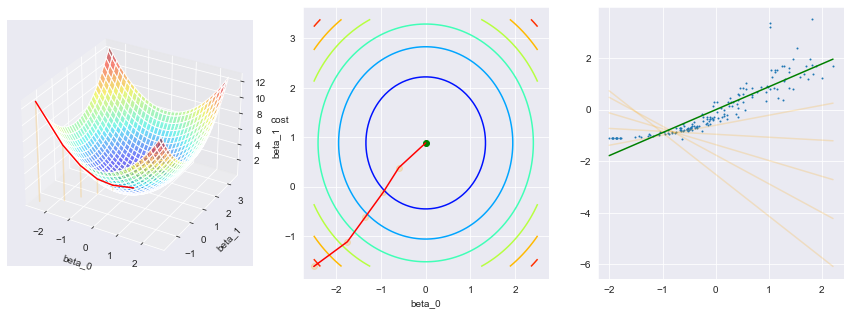

In [660]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, bbeta_0_deltas, bbeta_1_deltas, get_model=get_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_step_5.png'))
plt.show()

In [661]:
bbeta_0 = 0.88
bbeta_1 = 0.1

beta_delta = 50

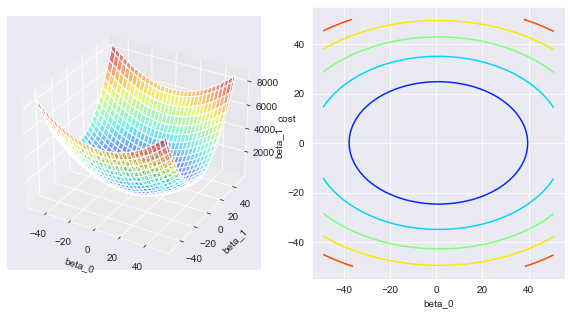

In [691]:
def get_non_linear_model(beta_0, beta_1):
    def model(xs):
        # return np.cos(beta_0 / 10) + np.cos(beta_1 / 10) * xs[:, 0]
        return beta_0 * xs[:, 0] + beta_1 * np.power(xs[:, 0], 2)
    return model

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_J(ax, bbeta_0, bbeta_1, X_norm, y, beta_delta=50, get_model=get_non_linear_model)
ax2d = fig.add_subplot(1, 2, 2)
ax2d.set_xlim(ax.get_xlim())
ax2d.set_ylim(ax.get_ylim())
plot_J_contour(ax2d, bbeta_0, bbeta_1, X_norm, y, beta_delta=50, get_model=get_non_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_cost_function_non_convex.png'))
plt.show()

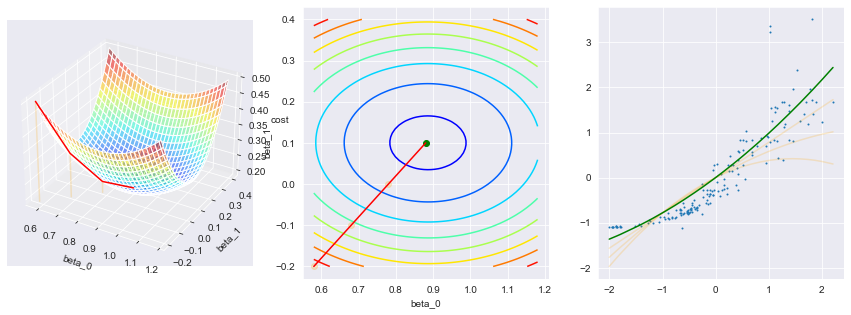

In [692]:
plot_gradient_descent(bbeta_0, bbeta_1, X_norm, y, [.3, .2, .1, 0], [.3, .2, .1, 0], get_model=get_non_linear_model)
plt.savefig(os.path.join(out_dir, 'gradient_descent_non_convex_step_0.png'))
plt.show()